# Segmenting and Clustering Neighborhoods in Toronto

## Part one of the assignment

Importing necessary libraries.

In [1]:
import requests
from bs4 import BeautifulSoup


Getting data from wikipedia

In [2]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
response = requests.get(url)

In [3]:
response.content[:500]

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of postal codes of Canada: M - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YCPH14zy38Pi6hl1WcWOLw'

Creating BeautifulSoup object to parse wanted data

In [4]:
soup = BeautifulSoup(response.content)

In [5]:
table=soup.find('table')


Getting the data from wiki's table into one list, since all table columns have same html tag.

In [6]:
res_list=table.find_all('td')

Separating only text values from list

In [7]:
res_list=[rec.text.strip() for rec in res_list]

In [8]:
res_list[:10]

['M1A',
 'Not assigned',
 'Not assigned',
 'M2A',
 'Not assigned',
 'Not assigned',
 'M3A',
 'North York',
 'Parkwoods',
 'M4A']

Now i will prepare 3 separate lists for PostaCode, Borough and Neighbourhood. From those lists DataFrame will be created

In [9]:
postal_codes=res_list[::3]
borough = res_list[1::3]
neighbourhood=res_list[2::3]


In [10]:
import pandas as pd


In [11]:
df=pd.DataFrame({'PostalCode':postal_codes, 'Borough':borough, 'Neighbourhood':neighbourhood})

In [12]:
df.head(10)

,PostalCode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


Cleening rows where Borough is not assigned.

In [13]:
df=df[df["Borough"]!='Not assigned']


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In the assignment is mentioned that in the wiki table some postal codes are mentioned more than just once. But it is not true. Following chart is a proof of it.

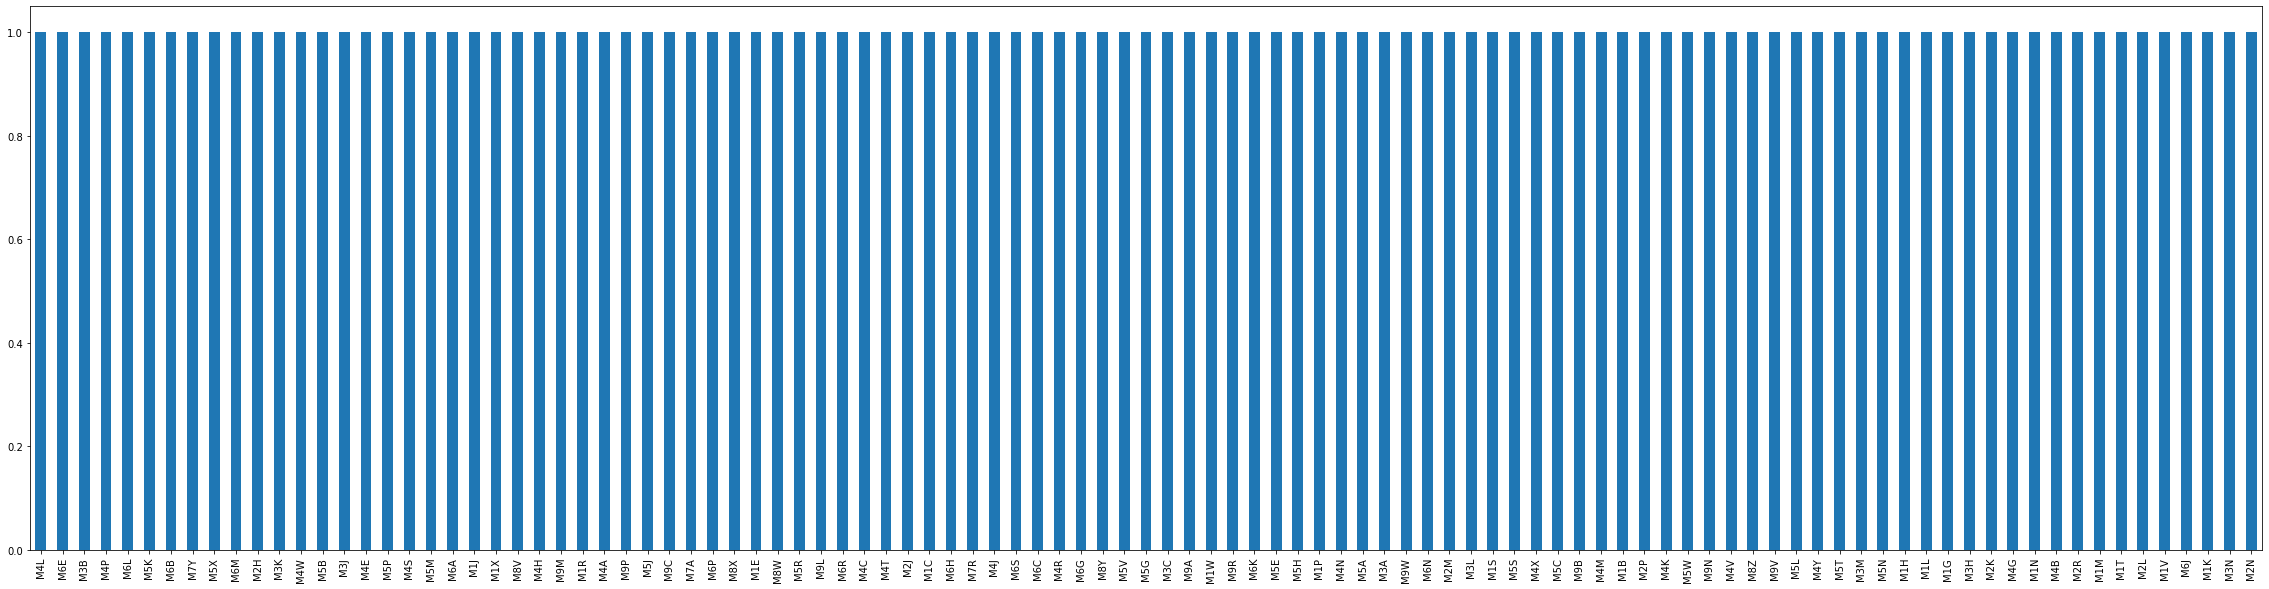

In [15]:
df['PostalCode'].value_counts().plot(kind='bar',figsize=(40,10))

In the assignment there is also a request to replace Boroughs name in Neighbourhood if Neighbourhood is no assigned. But there is no such issue. That is why there is an error in following cell. It seems somone already adjust the table on wikipedia according to the assignment.

now i am just reindexing. Then it is done.

In [16]:
df=df.reindex()


### And folowing cells show an answer for 1st question

In [17]:
print('Number of rows in dataframe is:',df.shape[0])

Number of rows in dataframe is: 103


## Part two of the assignment

In [18]:
import geocoder

I have tried geocoders. it does not seem to work. So I am using CSV instaed

In [19]:
file='Geospatial_Coordinates.csv'
locations=pd.read_csv(file)

In [20]:
locations

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [21]:
df.sort_values('PostalCode',inplace=True)
df.reset_index(inplace=True)

In [22]:
df['Latitude']=locations['Latitude']
df['Longitude']=locations['Longitude']

In [23]:
df.drop('index',axis=1,inplace=True)

### folowing cells show an answer for 2st question

In [24]:
df

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


## Part three of the assignment
At first i would like to see centers of that posatl code areas on the map to see how dense they are placed. Is it proporcional or not. I am just curious

In [25]:
import folium


In [26]:
import numpy as np

In [27]:
lat=df['Latitude'].to_list()
long=df['Longitude'].to_list()
codes=df['PostalCode'].to_list()
neighbourhood=df['Neighbourhood'].to_list()

# merge postal codes and neigbourhood to see both information as a pop-up
places=[]
for code, neigh in zip(codes,neighbourhood):
    places.append(neigh + '(' + code +')')


I have no idea why, but folium cannot create pop-up when there is an single apostrof '. So I am changing all ' to ".

In [28]:
places=[i.replace("'",'"') for i in places]


In [29]:

M=folium.Map(location=[43.651070,-79.347015],zoom_start=10.45)

# markers
for la, lo, lab in zip(lat, long, places):
    
    folium.Marker([la,lo],popup=lab).add_to(M)
M

They seems dispersed quite evenly, except of Downtown Toronto Borough, where they are denser


In [30]:
import json
with open('neighbourhoods_toronto.geojson') as f:
    data = json.load(f)


OK. Since this assignment is based on Postal code areas, which may or may not contain more Neighbourhoods at first I would like to see what should be considered optimal range for Forsquare api. So first thing to do is to evaluate euclidean distance between all centers and put them to dataframe. Distance from geopy package will be used for that.

In [31]:
from geopy import distance

Just checking the function

In [32]:

point1=(df['Latitude'][0],df['Longitude'][0])
point2=(df['Latitude'][10],df['Longitude'][10])
print('Point1',point1)
print('Point2',point2)
print('distance of points in meters:',distance.distance(point1, point2).meters)
print('distance of points in kilometers:',distance.distance(point1, point2).kilometers)
print('distance of points in miles:',distance.distance(point1, point2).miles)


Point1 (43.806686299999996, -79.19435340000001)
Point2 (43.7574096, -79.27330400000001)
distance of points in meters: 8388.556968290055
distance of points in kilometers: 8.388556968290056
distance of points in miles: 5.212407644537187


prepaing the dataframe containing distannce data between centers of Postal code areas



In [33]:
dist_df=pd.DataFrame(index=df['PostalCode'],columns=df['PostalCode'] )
dist_df.head()

PostalCode,M1B,M1C,M1E,M1G,M1H,M1J,M1K,M1L,M1M,M1N,...,M9A,M9B,M9C,M9L,M9M,M9N,M9P,M9R,M9V,M9W
PostalCode,,,,,,,,,,,,,,,,,,,,,
M1B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M1H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


And finaly applying distance function to created dataframe.

In [34]:
n,m=-1,-1
for x1,y1 in zip(df['Latitude'],df['Longitude']):
    n=n+1
    m=-1
    for x2,y2 in zip(df['Latitude'],df['Longitude']):
        m=m+1
        point1=(x1,y1)
        point2=(x2,y2)
        
        dist_df.iloc[n,m]=distance.distance(point1, point2).kilometers
        
        #dist_df.iloc[n,m]='n={}, m={}'.format(n,m)
        #dist_df.iloc[n,m]=[x1,y1,x2,y2]
        #dist_df.iloc[n,m]=get_distance(x1,y1,x2,y2)
    
dist_df.head()
    
    
    

PostalCode,M1B,M1C,M1E,M1G,M1H,M1J,M1K,M1L,M1M,M1N,...,M9A,M9B,M9C,M9L,M9M,M9N,M9P,M9R,M9V,M9W
PostalCode,,,,,,,,,,,,,,,,,,,,,
M1B,0,3.67177,4.81176,4.36199,5.20445,7.78315,10.3085,12.8668,10.6781,13.8836,...,31.2868,33.8006,35.781,30.4338,28.6893,28.3393,29.8488,31.8397,32.5966,34.0505
M1C,3.67177,0,3.2534,4.78487,6.48301,7.74597,10.3158,12.9008,9.89518,13.224,...,32.6381,35.0653,37.0576,32.7964,30.6665,30.0756,31.5091,33.4891,34.823,35.9757
M1E,4.81176,3.2534,0,2.4161,4.2233,4.59305,7.11053,9.6756,6.65517,9.98566,...,29.6569,32.0448,34.0367,30.3904,28.0053,27.2806,28.6689,30.6358,32.3056,33.26
M1G,4.36199,4.78487,2.4161,0,1.83181,3.43684,6.00786,8.60057,6.34086,9.52178,...,27.8743,30.3171,32.3086,28.1539,25.912,25.2934,26.7244,28.7043,30.1254,31.2083
M1H,5.20445,6.48301,4.2233,1.83181,0,3.15565,5.34118,7.79035,6.31311,9.17245,...,26.3323,28.8067,30.795,26.356,24.1851,23.628,25.0828,27.0681,28.3517,29.5003


In [35]:
import numpy as np

In next table can be seen descriptive statistical values for distances between each other

In [36]:
dist_df.replace(0,np.nan,inplace=True)
dist_df.describe()

PostalCode,M1B,M1C,M1E,M1G,M1H,M1J,M1K,M1L,M1M,M1N,...,M9A,M9B,M9C,M9L,M9M,M9N,M9P,M9R,M9V,M9W
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,...,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,20.824441,21.901337,19.132258,17.554115,16.305454,15.232821,13.513187,12.074033,14.788705,13.307756,...,13.560194,15.474066,17.210324,16.645195,13.487680,12.388380,13.151350,14.583912,17.488110,17.284492
std,7.839625,7.925958,7.611370,7.449832,7.167377,6.840475,6.293569,5.790003,6.466832,5.935921,...,6.962792,7.435472,7.684595,6.210268,6.196723,6.187769,6.579020,7.000972,6.690869,7.164664
min,3.394464,3.253397,2.416097,1.831814,1.831814,2.605267,2.228811,2.109989,2.228811,2.594867,...,2.579549,1.992361,1.992361,2.607095,2.287717,1.630695,1.630695,1.990869,2.607095,3.657765
25%,16.055362,17.523802,14.684841,12.826769,11.595193,10.437845,9.282006,8.453478,10.417147,9.654848,...,8.853482,10.601805,12.376771,13.015601,9.438447,8.092453,8.152895,9.183067,13.255361,12.081099
50%,21.707712,22.633829,19.467248,18.183215,16.539540,14.973848,12.735837,10.661135,13.778638,11.784018,...,12.328343,14.207007,16.105307,17.166436,13.441511,11.761546,12.461709,14.197387,17.429946,17.369400
75%,25.702485,26.922178,24.006796,22.415361,20.921205,19.820296,17.491157,15.425122,18.840376,16.806715,...,17.357058,19.428124,21.382412,19.953462,16.231698,15.772463,16.920129,18.698603,20.839973,21.372575
max,38.845616,40.192790,37.191447,35.433900,33.897749,32.618464,30.264380,27.954084,31.603094,28.976371,...,32.638095,35.065344,37.057557,32.796356,30.666501,30.075579,31.509150,33.489134,34.823022,35.975716


But more important is to to find the mean of minimal distances from previous table. This value will be used as a range parameter in Foresquare api 

In [37]:
dist_df.describe().loc['min'].mean()

1.7692339960945858

OK. But i expected much less. Of course only half of the distance should be use, because previous value is mean distance between two centers.

In [38]:
radius=dist_df.describe().loc['min'].mean()/2
radius

0.8846169980472929

In [59]:

M=folium.Map(location=[43.651070,-79.347015],zoom_start=12)

# markers
for la, lo, lab in zip(lat, long, places):
    
    folium.Marker([la,lo],popup=lab).add_to(M)
    
    folium.Circle([la,lo],radius*1000).add_to(M)
M

There is a lot of overlaping especialy in downtown area. Therefor in downtown area, only one fifth of original distance will be applied

In [60]:

M=folium.Map(location=[43.651070,-79.347015],zoom_start=12)

# markers
for la, lo, lab in zip(lat, long, places):
    
    folium.Marker([la,lo],popup=lab).add_to(M)
    if lab.find('M5')!=-1:
        folium.Circle([la,lo],radius*500,color='red').add_to(M)
    else:
        
        folium.Circle([la,lo],radius*1000).add_to(M)
M

It is little bit better, but not much. Therfore, in order to be shure one venue is assigned to one Postal code area, distances towards centers will be evaluated. The venue will be assigned to shortest distance to the center. 

### Data from Foursquare api
As i mentioned earlier, two separate requests will be send. One for Downtown area and another for the rest. I will apply function from previous lab.

In [41]:
CLIENT_ID = '1HSLXAN3NEVXHOAK45ETJQ5012KSY3UB4G50QVMLLD3ZUH3A' # your Foursquare ID
CLIENT_SECRET = '4Y1CK3DAQU31YPWHRYLWWMZND2BIKV1TIYZ3MJCUUTEZO5FL' # your Foursquare Secret
VERSION = '20210127' # Foursquare API version
ACCESS_TOKEN = 'OA2Z4SHGJIQQTFY4AQB5DROTH2OPYUZJO34FBQEGEAVYXQ2B'

In [42]:
# the limmit for venus will be 200. I gues a lot of venues will be later eliminated due to asignment.
limit=200

In [43]:
def getNearbyVenues(names, latitudes, longitudes,LIMIT=limit):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # condition for radius 
        if name.find('M5')!=-1:
            used_radius=radius*500
        else:
            used_radius=radius*1000
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            used_radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            #distance
            v['venue']['location']['distance']) for v in results])
            
        

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category',
                  'Distance from center']
    
    return(nearby_venues)

Because i needed to run send requests to Fursquare API multiple times, i have figured out, result venues are always in different order. That is why I am saving current results to csv in order to not run this again.

In [45]:
#venues_df.to_csv('Venues.csv')

I need to load csv because I have made a mistake and i  don't want to send requests to API again.

In [46]:
venues_df=pd.read_csv('Venues.csv')
venues_df.drop('Unnamed: 0',inplace=True,axis=1)

In [47]:
venues_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Distance from center,parameter
0,"Malvern, Rouge(M1B)",43.806686,-79.194353,Images Salon & Spa,43.802283,-79.198565,Spa,595,-3469.077947
1,"Malvern, Rouge(M1B)",43.806686,-79.194353,Harvey's,43.800020,-79.198307,Restaurant,807,-3468.887452
2,"Malvern, Rouge(M1B)",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant,387,-3469.508542
3,"Malvern, Rouge(M1B)",43.806686,-79.194353,Wendy's,43.802008,-79.198080,Fast Food Restaurant,600,-3469.034952
4,"Malvern, Rouge(M1B)",43.806686,-79.194353,Staples Morningside,43.800285,-79.196607,Paper / Office Supplies Store,735,-3468.833913


### Filtering overlaped venues
Since venues have frequently same name
e.g. 
Starbucks                                     93
Tim Hortons                                   91
Subway                                        52
TD Canada Trust                               39
Pizza Pizza                                   38

I will use parameter = longitude * latitude as evidence for presence in multiple Postal code areas. Unique parameter means unique venue

In [48]:
venues_df['Venue'].value_counts()

Starbucks                             92
Tim Hortons                           92
Subway                                52
TD Canada Trust                       39
Pizza Pizza                           38
                                      ..
Fratelli Village Pizzeria              1
The Only Backpacker's Inn              1
Java Joe's                             1
Mildred's Temple Kitchen               1
Long & McQuade Musical Instruments     1
Name: Venue, Length: 2569, dtype: int64

In [49]:
venues_df['parameter']=venues_df['Venue Latitude']*venues_df['Venue Longitude']
venues_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Distance from center,parameter
0,"Malvern, Rouge(M1B)",43.806686,-79.194353,Images Salon & Spa,43.802283,-79.198565,Spa,595,-3469.077947
1,"Malvern, Rouge(M1B)",43.806686,-79.194353,Harvey's,43.800020,-79.198307,Restaurant,807,-3468.887452
2,"Malvern, Rouge(M1B)",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant,387,-3469.508542
3,"Malvern, Rouge(M1B)",43.806686,-79.194353,Wendy's,43.802008,-79.198080,Fast Food Restaurant,600,-3469.034952
4,"Malvern, Rouge(M1B)",43.806686,-79.194353,Staples Morningside,43.800285,-79.196607,Paper / Office Supplies Store,735,-3468.833913


In [50]:
non_unique=venues_df['parameter'].value_counts() # series of counts of parameters
print('Number of repeating venues:',non_unique[non_unique!=1].count())
print('Number of unique:',non_unique[non_unique==1].count())

Number of repeating venues: 406
Number of unique: 2877


Those repeating venues must be assigned to only one area.

In [51]:
non_unique

-3464.793341    5
-3464.579999    5
-3464.770292    5
-3465.025079    4
-3464.739918    4
               ..
-3466.835446    1
-3472.802373    1
-3476.074790    1
-3468.526329    1
-3473.168404    1
Name: parameter, Length: 3283, dtype: int64

In [52]:
non_unique_parameters=non_unique[non_unique!=1].index.to_list()
len(non_unique_parameters)

406

Following cell is just a quick check

In [53]:
venues_df[venues_df['parameter']==non_unique_parameters[0]]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Distance from center,parameter
1854,St. James Town(M5C),43.651494,-79.375418,Café Plenty,43.649118,-79.378313,Café,352,-3464.793341
2161,"Toronto Dominion Centre, Design Exchange(M5K)",43.647177,-79.381576,Café Plenty,43.649118,-79.378313,Café,340,-3464.793341
2233,"Commerce Court, Victoria Hotel(M5L)",43.648198,-79.379817,Café Plenty,43.649118,-79.378313,Café,158,-3464.793341
2496,Stn A PO Boxes(M5W),43.646435,-79.374846,Café Plenty,43.649118,-79.378313,Café,408,-3464.793341
2571,"First Canadian Place, Underground city(M5X)",43.648429,-79.382280,Café Plenty,43.649118,-79.378313,Café,328,-3464.793341


The closest Postal code area center to "Beerbistro" is Commerce Court, Victoria Hotel(M5L) with a distance of 248 m. I would like to confirm it on the map as a confirmation of this method.

In [54]:
hal_lat=venues_df[venues_df['parameter']==non_unique_parameters[0]].iloc[1,4]
hal_lon=venues_df[venues_df['parameter']==non_unique_parameters[0]].iloc[1,5]
hal_name=venues_df[venues_df['parameter']==non_unique_parameters[0]].iloc[1,3]

In [57]:
# map is centered to Beerbistro
M=folium.Map(location=[hal_lat,hal_lon],zoom_start=14)

# markers
for la, lo, lab in zip(lat, long, places):
    
    folium.Marker([la,lo],popup=lab).add_to(M)
    if lab.find('M5')!=-1:
        folium.Circle([la,lo],radius*500,color='red').add_to(M)
    else:
        
        folium.Circle([la,lo],radius*1000).add_to(M)

folium.Marker([hal_lat,hal_lon],popup=hal_name, icon=folium.Icon(color='black',icon_color='#FFFF00')).add_to(M)
M

Visualy confirmed.
Now by this process i will eliminate all duplicates.

In [61]:
venues_df.to_csv('Venues.csv')

In [62]:
venues_df.shape

(3854, 9)

In [256]:
clean_venues_df=venues_df
for ven in non_unique_parameters:
    # selection is sub DF with duplicates
    selection=venues_df[venues_df['parameter']==ven]
    selection=selection.sort_values('Distance from center')
    ind=selection.iloc[1:,:].index
    clean_venues_df.drop(ind,inplace=True)

Just to be sure previous cell eliminate nonunique venues correctly:
    

In [64]:
non_unique=venues_df['parameter'].value_counts() # series of counts of parameters
print('Number of repeating venues:',non_unique[non_unique!=1].count())
print('Number of unique:',non_unique[non_unique==1].count())
      

Number of repeating venues: 0
Number of unique: 3283


OK. Also Beerbisto venue shuld be assigned to Commerce Court, Victoria Hotel(M5L)

In [65]:
clean_venues_df[clean_venues_df['Venue']=='Beerbistro']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Distance from center,parameter
2234,"Commerce Court, Victoria Hotel(M5L)",43.648198,-79.379817,Beerbistro,43.649419,-79.377237,Gastropub,248,-3464.770292


Confirmed. Now let's find how many venue category exists

In [66]:
print('There are',len(clean_venues_df['Venue Category'].unique()), 'unique categories')
print('Ten most frequent venue categories are \n', clean_venues_df['Venue Category'].value_counts(ascending=False).head(10))

There are 330 unique categories
Ten most frequent venue categories are 
 Coffee Shop           247
Café                  120
Pizza Place           116
Park                  113
Restaurant             85
Bakery                 72
Italian Restaurant     70
Sandwich Place         66
Grocery Store          66
Bank                   55
Name: Venue Category, dtype: int64


# Scenario
Now let's consider comeone is moving from center of one postal area to another and want to find 
1) simmilar neighbourhood based on occurence of venues (same approach as in lab);
2) the person is lazy and using only the closest venue in respective category from the center and when he or she will move  simmilar distances are required. 

## 1) Frequency segmentation
I will just apply same approach as in the previous lab. first step is one-hot encoding and add neighbourhoods

In [67]:
toronto_onehot = pd.get_dummies(clean_venues_df[['Venue Category']],prefix="", prefix_sep="")
toronto_onehot.head()

,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
toronto_onehot.drop('Neighborhood',axis=1,inplace=True)

In [69]:
#moving neighborhood to first column
neigh=clean_venues_df['Neighborhood']
toronto_onehot=pd.concat([neigh,toronto_onehot],axis=1)
toronto_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,"Malvern, Rouge(M1B)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Malvern, Rouge(M1B)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Malvern, Rouge(M1B)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Malvern, Rouge(M1B)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Malvern, Rouge(M1B)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
pd.set_option('display.max_rows', 500)

In [71]:
# grouping by mean
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean()
# showing only Coffee Shops mean occurence
toronto_grouped['Coffee Shop'].to_frame().sort_values(by='Coffee Shop',ascending=False)

,Coffee Shop
Neighborhood,
Woburn(M1G),0.500000
"Toronto Dominion Centre, Design Exchange(M5K)",0.387097
Central Bay Street(M5G),0.300000
"Northwest, West Humber - Clairville(M9W)",0.250000
"Regent Park, Harbourfront(M5A)",0.181818
Downsview(M3K),0.176471
Victoria Village(M4A),0.166667
"Malvern, Rouge(M1B)",0.153846
"The Annex, North Midtown, Yorkville(M5R)",0.150000


In [72]:
toronto_grouped.shape

(102, 329)

Next step is to show top 10 venues by neighborhood

In [73]:
top10=pd.DataFrame()
for ind, value in enumerate(toronto_grouped.T):
    
    top10[value]=toronto_grouped.iloc[ind].nlargest(10).index
    
top10=top10.T

top10.columns=[str(i) +'. Most Common Venue' for i in range(1,11)]
top10
    

,1. Most Common Venue,2. Most Common Venue,3. Most Common Venue,4. Most Common Venue,5. Most Common Venue,6. Most Common Venue,7. Most Common Venue,8. Most Common Venue,9. Most Common Venue,10. Most Common Venue
Agincourt(M1S),Chinese Restaurant,Bakery,Shopping Mall,Badminton Court,Bank,Breakfast Spot,Café,Caribbean Restaurant,Clothing Store,Convenience Store
"Alderwood, Long Branch(M8W)",Convenience Store,Discount Store,Pizza Place,Coffee Shop,Donut Shop,Gas Station,Gym,Park,Pharmacy,Pub
"Bathurst Manor, Wilson Heights, Downsview North(M3H)",Bank,Coffee Shop,Park,Pizza Place,Bridal Shop,Community Center,Deli / Bodega,Diner,Fried Chicken Joint,Frozen Yogurt Shop
Bayview Village(M2K),Bank,Gas Station,Grocery Store,Intersection,Japanese Restaurant,Café,Chinese Restaurant,Park,Restaurant,Shopping Mall
"Bedford Park, Lawrence Manor East(M5M)",Coffee Shop,Italian Restaurant,Juice Bar,Sandwich Place,Butcher,Café,Comfort Food Restaurant,Cupcake Shop,Greek Restaurant,Grocery Store
Berczy Park(M5E),Clothing Store,Coffee Shop,Greek Restaurant,Grocery Store,Hotel,Liquor Store,Lounge,Nightclub,Sushi Restaurant,ATM
"Birch Cliff, Cliffside West(M1N)",Park,Café,College Stadium,Diner,General Entertainment,Gym,Skating Rink,Thai Restaurant,ATM,Accessories Store
"Brockton, Parkdale Village, Exhibition Place(M6K)",Coffee Shop,Restaurant,Café,Furniture / Home Store,Bakery,Bar,Art Gallery,Arts & Crafts Store,Gift Shop,Indian Restaurant
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto(M7Y)",Brewery,Pizza Place,BBQ Joint,Bakery,Bar,Burrito Place,Comic Shop,Electronics Store,Farmers Market,Fast Food Restaurant
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport(M5V)",Airport Lounge,Airport Terminal,Airport,Airport Food Court,Airport Gate,Airport Service,Bar,Boutique,Coffee Shop,Rental Car Location


And now clusterring

In [74]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [75]:
# set number of clusters
kclusters = 5

#manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 

In [76]:
# addition of cluster in the dataset
toronto_clustered=top10
toronto_clustered['Cluster']=kmeans.labels_

In [77]:
toronto_clustered.head()

,1. Most Common Venue,2. Most Common Venue,3. Most Common Venue,4. Most Common Venue,5. Most Common Venue,6. Most Common Venue,7. Most Common Venue,8. Most Common Venue,9. Most Common Venue,10. Most Common Venue,Cluster
Agincourt(M1S),Chinese Restaurant,Bakery,Shopping Mall,Badminton Court,Bank,Breakfast Spot,Café,Caribbean Restaurant,Clothing Store,Convenience Store,2
"Alderwood, Long Branch(M8W)",Convenience Store,Discount Store,Pizza Place,Coffee Shop,Donut Shop,Gas Station,Gym,Park,Pharmacy,Pub,3
"Bathurst Manor, Wilson Heights, Downsview North(M3H)",Bank,Coffee Shop,Park,Pizza Place,Bridal Shop,Community Center,Deli / Bodega,Diner,Fried Chicken Joint,Frozen Yogurt Shop,2
Bayview Village(M2K),Bank,Gas Station,Grocery Store,Intersection,Japanese Restaurant,Café,Chinese Restaurant,Park,Restaurant,Shopping Mall,3
"Bedford Park, Lawrence Manor East(M5M)",Coffee Shop,Italian Restaurant,Juice Bar,Sandwich Place,Butcher,Café,Comfort Food Restaurant,Cupcake Shop,Greek Restaurant,Grocery Store,2


#### And now individual clusters

Cluster 0

In [78]:
toronto_clustered[toronto_clustered['Cluster']==0]

,1. Most Common Venue,2. Most Common Venue,3. Most Common Venue,4. Most Common Venue,5. Most Common Venue,6. Most Common Venue,7. Most Common Venue,8. Most Common Venue,9. Most Common Venue,10. Most Common Venue,Cluster
"Forest Hill North & West, Forest Hill Road Park(M5P)",Park,Trail,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,0
"Moore Park, Summerhill East(M4T)",Park,Grocery Store,Candy Store,Electronics Store,Gym,Gym / Fitness Center,Metro Station,Thai Restaurant,Trail,ATM,0
"North Park, Maple Leaf Park, Upwood Park(M6L)",Convenience Store,Park,Bakery,Karaoke Bar,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,0
"Old Mill South, King""s Mill Park, Sunnylea, Humber Bay, Mimico NE, The Queensway East, Royal York South East, Kingsway Park South East(M8Y)",Park,Gym / Fitness Center,Shopping Mall,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,0
Rosedale(M4W),Park,Bank,Coffee Shop,Japanese Restaurant,Pie Shop,Playground,Sandwich Place,ATM,Accessories Store,Adult Boutique,0
Woburn(M1G),Coffee Shop,Park,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,0
York Mills West(M2P),Park,Bowling Alley,Convenience Store,Dog Run,Golf Course,Gym,Pet Store,Restaurant,Tennis Court,ATM,0


Cluster 1

In [79]:
toronto_clustered[toronto_clustered['Cluster']==1]

,1. Most Common Venue,2. Most Common Venue,3. Most Common Venue,4. Most Common Venue,5. Most Common Venue,6. Most Common Venue,7. Most Common Venue,8. Most Common Venue,9. Most Common Venue,10. Most Common Venue,Cluster
Berczy Park(M5E),Clothing Store,Coffee Shop,Greek Restaurant,Grocery Store,Hotel,Liquor Store,Lounge,Nightclub,Sushi Restaurant,ATM,1
Central Bay Street(M5G),Coffee Shop,Art Museum,Bank,Bubble Tea Shop,Café,Discount Store,Gastropub,Indian Restaurant,Italian Restaurant,Juice Bar,1
"Fairview, Henry Farm, Oriole(M2J)",Clothing Store,Coffee Shop,Bank,Japanese Restaurant,Juice Bar,American Restaurant,Asian Restaurant,Bakery,Burger Joint,Chocolate Shop,1
"Malvern, Rouge(M1B)",Coffee Shop,Fast Food Restaurant,Restaurant,Trail,Chinese Restaurant,Martial Arts School,Paper / Office Supplies Store,Spa,Supermarket,ATM,1
"Northwest, West Humber - Clairville(M9W)",Coffee Shop,Dog Run,Lounge,Moving Target,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,1
"Toronto Dominion Centre, Design Exchange(M5K)",Coffee Shop,Restaurant,Bakery,Hotel,Beer Bar,Building,Clothing Store,Cocktail Bar,Concert Hall,Deli / Bodega,1


Cluster 2

In [80]:
toronto_clustered[toronto_clustered['Cluster']==2]

,1. Most Common Venue,2. Most Common Venue,3. Most Common Venue,4. Most Common Venue,5. Most Common Venue,6. Most Common Venue,7. Most Common Venue,8. Most Common Venue,9. Most Common Venue,10. Most Common Venue,Cluster
Agincourt(M1S),Chinese Restaurant,Bakery,Shopping Mall,Badminton Court,Bank,Breakfast Spot,Café,Caribbean Restaurant,Clothing Store,Convenience Store,2
"Bathurst Manor, Wilson Heights, Downsview North(M3H)",Bank,Coffee Shop,Park,Pizza Place,Bridal Shop,Community Center,Deli / Bodega,Diner,Fried Chicken Joint,Frozen Yogurt Shop,2
"Bedford Park, Lawrence Manor East(M5M)",Coffee Shop,Italian Restaurant,Juice Bar,Sandwich Place,Butcher,Café,Comfort Food Restaurant,Cupcake Shop,Greek Restaurant,Grocery Store,2
"Birch Cliff, Cliffside West(M1N)",Park,Café,College Stadium,Diner,General Entertainment,Gym,Skating Rink,Thai Restaurant,ATM,Accessories Store,2
"Brockton, Parkdale Village, Exhibition Place(M6K)",Coffee Shop,Restaurant,Café,Furniture / Home Store,Bakery,Bar,Art Gallery,Arts & Crafts Store,Gift Shop,Indian Restaurant,2
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto(M7Y)",Brewery,Pizza Place,BBQ Joint,Bakery,Bar,Burrito Place,Comic Shop,Electronics Store,Farmers Market,Fast Food Restaurant,2
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport(M5V)",Airport Lounge,Airport Terminal,Airport,Airport Food Court,Airport Gate,Airport Service,Bar,Boutique,Coffee Shop,Rental Car Location,2
Canada Post Gateway Processing Centre(M7R),Coffee Shop,Chinese Restaurant,Hotel,Middle Eastern Restaurant,Asian Restaurant,Bakery,Burrito Place,Bus Station,Fried Chicken Joint,Indian Restaurant,2
Cedarbrae(M1H),Bakery,Coffee Shop,Indian Restaurant,Athletics & Sports,Bank,Burger Joint,Bus Line,Caribbean Restaurant,Chinese Restaurant,Flower Shop,2
Christie(M6G),Korean Restaurant,Coffee Shop,Café,Grocery Store,Cocktail Bar,Mexican Restaurant,Pizza Place,Pub,Breakfast Spot,Convenience Store,2


Cluster 3

In [81]:
toronto_clustered[toronto_clustered['Cluster']==3]

,1. Most Common Venue,2. Most Common Venue,3. Most Common Venue,4. Most Common Venue,5. Most Common Venue,6. Most Common Venue,7. Most Common Venue,8. Most Common Venue,9. Most Common Venue,10. Most Common Venue,Cluster
"Alderwood, Long Branch(M8W)",Convenience Store,Discount Store,Pizza Place,Coffee Shop,Donut Shop,Gas Station,Gym,Park,Pharmacy,Pub,3
Bayview Village(M2K),Bank,Gas Station,Grocery Store,Intersection,Japanese Restaurant,Café,Chinese Restaurant,Park,Restaurant,Shopping Mall,3
Caledonia-Fairbanks(M6E),Mexican Restaurant,Park,Pharmacy,Bakery,Bank,Beer Store,Bus Line,Bus Stop,Café,Coffee Shop,3
"Clarks Corners, Tam O""Shanter, Sullivan(M1T)",Pharmacy,Convenience Store,Pizza Place,Shopping Mall,Bank,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Fried Chicken Joint,Gas Station,3
"Cliffside, Cliffcrest, Scarborough Village West(M1M)",Ice Cream Shop,Pizza Place,Auto Garage,Park,Pharmacy,Restaurant,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,3
Downsview(M3L),Park,Bank,Grocery Store,Moving Target,Pizza Place,Shopping Mall,Vietnamese Restaurant,ATM,Accessories Store,Adult Boutique,3
Downsview(M3N),Hotel,Grocery Store,Discount Store,Fast Food Restaurant,Gas Station,Pharmacy,Pizza Place,American Restaurant,Athletics & Sports,Beer Store,3
Glencairn(M6B),Grocery Store,Fast Food Restaurant,Pizza Place,Coffee Shop,Furniture / Home Store,Gas Station,Asian Restaurant,Bakery,Bank,Bus Line,3
"Golden Mile, Clairlea, Oakridge(M1L)",Intersection,Bakery,Bus Line,Bank,Bus Station,Coffee Shop,Convenience Store,Diner,Fast Food Restaurant,Gym,3
"Guildwood, Morningside, West Hill(M1E)",Pizza Place,Bank,Fast Food Restaurant,Beer Store,Coffee Shop,Electronics Store,Filipino Restaurant,Fried Chicken Joint,Greek Restaurant,Medical Center,3


Cluster 4

In [82]:
toronto_clustered[toronto_clustered['Cluster']==4]

,1. Most Common Venue,2. Most Common Venue,3. Most Common Venue,4. Most Common Venue,5. Most Common Venue,6. Most Common Venue,7. Most Common Venue,8. Most Common Venue,9. Most Common Venue,10. Most Common Venue,Cluster
Roselawn(M5N),Garden,Home Service,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,4


#### Map of clusters
Unfortunatelly i am using different Neighborhood distinction in 2 different DataFrames so first step before map creation is to put Cluster column in the dataframe with longitude and latitude.

In [ ]:

# spliting PostalCodes
postal_codes=[]
for name in toronto_clustered.index:
    postal_codes.append(name.split('(')[-1][:-1])

# append postal_codes to toronto_clustered
toronto_clustered['PostalCode']=postal_codes
# preparing df with only Postal codes and clusters
clusters_df=toronto_clustered[['PostalCode', 'Cluster']].reset_index(drop=True).sort_values('PostalCode').reset_index()

In [84]:
# preparing df with only Postal codes and clusters
clusters_df=toronto_clustered[['PostalCode', 'Cluster']].reset_index(drop=True).sort_values('PostalCode').reset_index()



In [85]:
# Postal codes to index
clusters_df.set_index('PostalCode',inplace=True)



In [86]:
#Postal cones to index also for df
df.set_index('PostalCode',inplace=True)

In [87]:
#Extending original df (with long,lat) by clusters
df['Cluster']=clusters_df['Cluster']

In [88]:
df.reset_index(inplace=True)

clusters are now assigned to original dataframe. Map can be created

In [89]:
clusters_df.shape

(102, 2)

In [90]:
df.dropna(axis=0,inplace=True)

In [91]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [92]:

# create map
map_clusters = folium.Map(location=[43.651070,-79.347015], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['Latitude'], df['Longitude'], df['PostalCode'], df['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 2) Distance to nearest venue
At first new dataframe is created that contains only distances to closest venus in respective type. I will focus on only 6 venues: Coffee Shop, Park, Restaurant, Bank, Gym and  Grocery Store, because they can be considerred as needed for live.
Moreover thre are manu venues that can be considered as restaurant. e.g Pizza Place, Italian Restaurant, Sandwich Place ...
All of them will change categories to Restaurant. For the purpose of this analysis whole venues dataset will be used, since it is more important that venue is closest to the center, than one venue is assigned to one postal code area.

In [93]:
venues_df['Venue Category'].value_counts()

Coffee Shop                                 247
Café                                        120
Pizza Place                                 116
Park                                        113
Restaurant                                   85
Bakery                                       72
Italian Restaurant                           70
Sandwich Place                               66
Grocery Store                                66
Bank                                         55
Fast Food Restaurant                         50
Gym                                          48
Japanese Restaurant                          47
Sushi Restaurant                             47
Pharmacy                                     47
Bar                                          45
Chinese Restaurant                           40
Indian Restaurant                            39
Thai Restaurant                              39
Convenience Store                            38
Pub                                     

In [94]:
filtered_categories=venues_df

If there is a Restaurant in venue category, or some of these 
Pizza Place
Sandwich Place
Breakfast Spot
Diner     
Burger Joint
Fried Chicken Joint
Gastropub
Lounge
BBQ Joint
Steakhouse
Bistro 
venue category will be changed to restaurant. If i would be more consistent, i would probably find more, but the purpose of this excersize is to find another approch in neighborhood segmentation.

In [95]:
similar_venues=['Pizza Place','Sandwich Place', 'Breakfast Spot', 'Diner', 'Burger Joint', 'Fried Chicken Joint', 'Gastropub', 'Lounge',
                'BBQ Joint', 'Steakhouse,Bistro']
for ind, cat in enumerate(filtered_categories['Venue Category']):
    if cat.find('Restaurant')!=-1:
        print(cat)
        filtered_categories.loc[ind,'Venue Category']='Restaurant'
        
        
    else:
        for sim in similar_venues:
            if cat==sim:
                filtered_categories.loc[ind,'Venue Category']='Restaurant'
                
    
    

Restaurant
Fast Food Restaurant
Fast Food Restaurant
Chinese Restaurant
Restaurant
Italian Restaurant
Restaurant
Fast Food Restaurant
Greek Restaurant
Fast Food Restaurant
Filipino Restaurant
Hakka Restaurant
Caribbean Restaurant
Indian Restaurant
Thai Restaurant
Indian Restaurant
Chinese Restaurant
German Restaurant
Restaurant
Fast Food Restaurant
Chinese Restaurant
Chinese Restaurant
Chinese Restaurant
Fast Food Restaurant
Chinese Restaurant
Asian Restaurant
Fast Food Restaurant
Restaurant
Thai Restaurant
Chinese Restaurant
Indian Restaurant
Chinese Restaurant
Indian Restaurant
Vietnamese Restaurant
Fast Food Restaurant
Restaurant
American Restaurant
Asian Restaurant
Vietnamese Restaurant
African Restaurant
Korean Restaurant
Seafood Restaurant
Indian Restaurant
Middle Eastern Restaurant
Restaurant
Asian Restaurant
Caribbean Restaurant
Chinese Restaurant
Chinese Restaurant
Seafood Restaurant
Malay Restaurant
Latin American Restaurant
Mediterranean Restaurant
Sushi Restaurant
Japanese 

Japanese Restaurant
Chinese Restaurant
Restaurant
Vegetarian / Vegan Restaurant
Seafood Restaurant
Sushi Restaurant
Restaurant
Indian Restaurant
Italian Restaurant
Italian Restaurant
Fast Food Restaurant
Restaurant
Chinese Restaurant
Restaurant
Restaurant
Restaurant
Italian Restaurant
Japanese Restaurant
Japanese Restaurant
New American Restaurant
Restaurant
Seafood Restaurant
Latin American Restaurant
Fast Food Restaurant
American Restaurant
Restaurant
Italian Restaurant
Japanese Restaurant
Italian Restaurant
Restaurant
Indian Restaurant
Italian Restaurant
Sushi Restaurant
Thai Restaurant
Comfort Food Restaurant
Greek Restaurant
Italian Restaurant
Indian Restaurant
Middle Eastern Restaurant
Japanese Restaurant
Restaurant
Italian Restaurant
French Restaurant
Sushi Restaurant
Comfort Food Restaurant
Mexican Restaurant
Caribbean Restaurant
Vietnamese Restaurant
Belgian Restaurant
Caribbean Restaurant
Vietnamese Restaurant
Mexican Restaurant
Comfort Food Restaurant
Vegetarian / Vegan Rest

In [96]:
filtered_categories.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Distance from center,parameter
0,"Malvern, Rouge(M1B)",43.806686,-79.194353,Images Salon & Spa,43.802283,-79.198565,Spa,595.0,-3469.077947
1,"Malvern, Rouge(M1B)",43.806686,-79.194353,Harvey's,43.800020,-79.198307,Restaurant,807.0,-3468.887452
2,"Malvern, Rouge(M1B)",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Restaurant,387.0,-3469.508542
3,"Malvern, Rouge(M1B)",43.806686,-79.194353,Wendy's,43.802008,-79.198080,Restaurant,600.0,-3469.034952
4,"Malvern, Rouge(M1B)",43.806686,-79.194353,Staples Morningside,43.800285,-79.196607,Paper / Office Supplies Store,735.0,-3468.833913


Now only 'Coffee Shop', 'Park', 'Restaurant', 'Bank', 'Gym',  'Grocery Store' are applicable. All other are droped

In [97]:
selected=['Coffee Shop', 'Park', 'Restaurant', 'Bank', 'Gym',  'Grocery Store']

filtered_categories=filtered_categories[filtered_categories['Venue Category'].isin(selected)]

# also NaN are droped
filtered_categories.dropna(axis=0,inplace=True)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Dataframe now contain only folowing venue categories

In [98]:
filtered_categories['Venue Category'].value_counts()

Restaurant       1010
Coffee Shop       176
Park               82
Grocery Store      52
Bank               41
Gym                35
Name: Venue Category, dtype: int64

Next step is to exclude all venues from Neigborhood except nearest from the center

In [99]:
filtered_categories.reset_index(drop=True,inplace=True)

In [100]:
shortest_distances=filtered_categories[['Neighborhood','Venue Category','Distance from center']]
niegh_set=set(shortest_distances['Neighborhood'].to_list())

for neigh in niegh_set:
    #print(neigh)
    A=shortest_distances[shortest_distances['Neighborhood']==neigh] 
    #print(A)
    for ven in selected:
        A=A[A['Venue Category']==ven]
                
        B=A[A['Distance from center']!=A['Distance from center'].min()]
        #print(B)
        # for the purpose of k-menas every neighborhood need some value for closest venue even though it is not listed in DF
        # for those missing venues 5000 m will be used as closest distance. 
        if B.empty and A.shape[0]!=1 and A.shape[0]!=1:
            shortest_distances=shortest_distances.append({'Neighborhood':neigh,
                           'Venue Category':ven,'Distance from center':5000},ignore_index=True)
        # else remove more distant venues in category
        else:
        
            shortest_distances.drop(B.index,inplace=True,axis=0)
        A=shortest_distances[shortest_distances['Neighborhood']==neigh]
        
        
            
            
        
        
        

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [190]:
shortest_distances

,Neighborhood,Venue Category,Distance from center
0,Agincourt(M1S),Gym,5000.0
1,Agincourt(M1S),Coffee Shop,5000.0
2,Agincourt(M1S),Restaurant,251.0
3,Agincourt(M1S),Park,867.0
4,Agincourt(M1S),Grocery Store,789.0
...,...,...,...
601,"York Mills, Silver Hills(M2L)",Bank,5000.0
602,"York Mills, Silver Hills(M2L)",Park,5000.0
603,"York Mills, Silver Hills(M2L)",Restaurant,723.0
604,"York Mills, Silver Hills(M2L)",Coffee Shop,5000.0


Next step is to rearange DF to contain distances to 6 venues 'Coffee Shop', 'Park', 'Restaurant', 'Bank', 'Gym',  'Grocery Store' and only one row for each neighborhood.

In [102]:
shortest_distances.sort_values('Neighborhood',inplace=True)

In [103]:
shortest_distances.shape

(607, 3)

Unfortulatelly, there is a problem in elimination because 607 is not divisible by 6. Folowing Postal code areas are mistaken. Due to insufficient time to check previous approach I will clean data manually.

In [104]:
for neigh in shortest_distances['Neighborhood'].unique():
    if shortest_distances[shortest_distances['Neighborhood']==neigh].shape[0]!=6:
        print(shortest_distances[shortest_distances['Neighborhood']==neigh].shape, neigh )

(7, 3) Guildwood, Morningside, West Hill(M1E)


In [105]:
shortest_distances[shortest_distances['Neighborhood']=="Guildwood, Morningside, West Hill(M1E)"]

,Neighborhood,Venue Category,Distance from center
361,"Guildwood, Morningside, West Hill(M1E)",Grocery Store,5000.0
360,"Guildwood, Morningside, West Hill(M1E)",Gym,5000.0
7,"Guildwood, Morningside, West Hill(M1E)",Park,571.0
5,"Guildwood, Morningside, West Hill(M1E)",Coffee Shop,803.0
4,"Guildwood, Morningside, West Hill(M1E)",Bank,408.0
3,"Guildwood, Morningside, West Hill(M1E)",Restaurant,526.0
6,"Guildwood, Morningside, West Hill(M1E)",Restaurant,526.0


In Guildwood, Morningside, West Hill(M1E) The same restaurant is there twice due to insufficiency in elimination loop. The same Therfore row wihth index 3 will be removed. The same approach will be applied for rest erroneous cases.

In [106]:
shortest_distances.drop(index=3,inplace=True)

In [135]:
shortest_distances.shape

(606, 3)

606 is divisible by 6 - correct

In [136]:
shortest_distances.reset_index(drop=True,inplace=True)


In [137]:
shortest_distances[shortest_distances['Neighborhood']=='Agincourt(M1S)']

,Neighborhood,Venue Category,Distance from center
0,Agincourt(M1S),Gym,5000.0
1,Agincourt(M1S),Coffee Shop,5000.0
2,Agincourt(M1S),Restaurant,251.0
3,Agincourt(M1S),Park,867.0
4,Agincourt(M1S),Grocery Store,789.0
5,Agincourt(M1S),Bank,870.0


with following cell the DataFrame is filled with values to be used for k-means

In [133]:
pre_kmeans=pd.DataFrame(index=shortest_distances['Neighborhood'].unique(), columns=shortest_distances['Venue Category'].unique())
for neigh,ven,dist in zip(shortest_distances['Neighborhood'],shortest_distances['Venue Category'], shortest_distances['Distance from center']):
    pre_kmeans.loc[neigh,ven]=dist
    

In [138]:
pre_kmeans.head()

,Gym,Coffee Shop,Restaurant,Park,Grocery Store,Bank
Agincourt(M1S),5000,5000,251,867,789,870
"Alderwood, Long Branch(M8W)",290,126,5000,711,5000,5000
"Bathurst Manor, Wilson Heights, Downsview North(M3H)",5000,93,62,410,5000,5000
Bayview Village(M2K),5000,5000,467,5000,652,696
"Bedford Park, Lawrence Manor East(M5M)",5000,90,24,5000,5000,5000


DF is correctly filled. Now k-means will be performed. This time number of clusters is 20 to find closest clusters

In [161]:
# set number of clusters
kclusters = 20

#manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(pre_kmeans)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([16, 12,  2,  3,  1, 14,  4, 15,  8,  6])

In [162]:
# addition of cluster in the dataset
pre_kmeans['Label']=kmeans.labels_


In [163]:
pre_kmeans['Label'].value_counts()

2     11
1      8
11     8
8      8
6      7
0      6
7      6
5      5
13     5
12     5
15     4
4      4
10     4
18     4
9      3
14     3
16     3
17     3
3      2
19     2
Name: Label, dtype: int64

In [166]:
# spliting PostalCodes
postal_codes=[]
for name in pre_kmeans.index:
    postal_codes.append(name.split('(')[-1][:-1])

In [168]:
# append postal_codes to toronto_clustered
pre_kmeans['PostalCode']=postal_codes

In [179]:
# Postal codes to index
clusters_df=pre_kmeans[['PostalCode','Label']]
clusters_df.set_index('PostalCode',inplace=True,drop=True)
clusters_series=clusters_df['Label']

In [180]:
# Updating main DF
df['Cluster 2']=clusters_series

#### Map of clusters 2


In [204]:
df.head()

,Borough,Neighbourhood,Latitude,Longitude,Cluster,Cluster 2
PostalCode,,,,,,
M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,1.0,1.0
M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,2.0,6.0
M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,3.0,10.0
M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,12.0
M1H,Scarborough,Cedarbrae,43.773136,-79.239476,2.0,9.0


In [205]:

# create map
map_clusters2 = folium.Map(location=[43.651070,-79.347015], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['Latitude'], df['Longitude'], df.index, df['Cluster 2']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [207]:
pre_kmeans[pre_kmeans['Label']==19]

,Gym,Coffee Shop,Restaurant,Park,Grocery Store,Bank,Label,PostalCode
Don Mills(M3B),455,5000,488,5000,5000,5000,19,M3B
"First Canadian Place, Underground city(M5X)",365,5000,13,5000,5000,5000,19,M5X


## Conclusion of Scenario 2 (and assigment part 3)
If i want to move to another location and i am used to distance to closest venue type i can use following table

In [255]:
con_df=df.drop(['Latitude', 'Longitude', 'Cluster'],axis=1)
con_df.sort_values('Cluster 2', ascending=True,inplace=True)
con_df


,Borough,Neighbourhood,Cluster 2
PostalCode,,,
M4L,East Toronto,"India Bazaar, The Beaches West",0.0
M4K,East Toronto,"The Danforth West, Riverdale",0.0
M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",0.0
M6G,Downtown Toronto,Christie,0.0
M8V,Etobicoke,"New Toronto, Mimico South, Humber Bay Shores",0.0
M6H,West Toronto,"Dufferin, Dovercourt Village",0.0
M1B,Scarborough,"Malvern, Rouge",1.0
M5H,Downtown Toronto,"Richmond, Adelaide, King",1.0
M5M,North York,"Bedford Park, Lawrence Manor East",1.0
